# Random Forest Classifier

In [35]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

data = pd.read_csv('heart_disease_by_ceo.csv', index_col=0)

x = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Random Forest
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.875


## Visualizing the Data

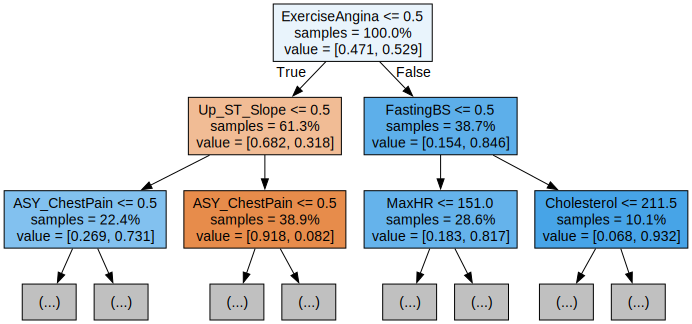

In [36]:
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,feature_names=x.columns, filled=True, max_depth=2, impurity=False, proportion=True)
graph = graphviz.Source(dot_data)
display(graph)

In [37]:
param_dist = {'n_estimators' : randint(5,500), 'max_depth': randint(1, 20)}

rf = RandomForestClassifier()

rand_search = RandomizedSearchCV(rf, param_dist, cv=5, n_iter=5)
rand_search.fit(x_train, y_train)
best_rf = rand_search.best_estimator_
print("Best hyperamaeters: ", rand_search.best_params_)

Best hyperamaeters:  {'max_depth': 11, 'n_estimators': 110}


Accuracy: 0.875
Precision: 0.9009009009009009
Recall: 0.8928571428571429


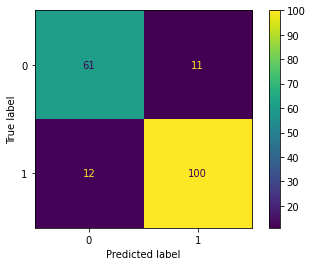

In [38]:
y_pred = best_rf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

In [39]:
#test 

liste_colonnes = ['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 
                  'MaxHR', 'ExerciseAngina', 'Oldpeak', 'TA_ChestPain', 
                  'ATA_ChestPain', 'NAP_ChestPain', 'ASY_ChestPain', 
                  'Normal_RestingECG', 'ST_RestingECG', 'LVH_RestingECG', 
                  'Up_ST_Slope', 'Flat_ST_Slope', 'Down_ST_Slope']


patient = [[40,0,140,289,0,172,0,0.0,0,1,0,0,1,0,0,1,0,0]] #1
patient2 = [[57,1,130,236,0,174,0,0.0,0,1,0,0,0,0,1,0,1,0]] #916
patient3 = [[57,0,130,131,0,115,1,1.2,0,0,0,1,1,0,0,0,1,0]] #915
patient4 = [[59,0,164,176,1,90,0,1.0,0,0,0,1,0,0,1,0,1,0]] #911

patient_df = pd.DataFrame(patient, columns=liste_colonnes)
patient_df2 = pd.DataFrame(patient2, columns=liste_colonnes)
patient_df3 = pd.DataFrame(patient3, columns=liste_colonnes)
patient_df4 = pd.DataFrame(patient4, columns=liste_colonnes)

prediction = best_rf.predict(patient_df)
prediction2 = best_rf.predict(patient_df2)
prediction3 = best_rf.predict(patient_df3)
prediction4 = best_rf.predict(patient_df4)

print(f'Prediction: {prediction}')
print(f'Prediction: {prediction2}')
print(f'Prediction: {prediction3}')
print(f'Prediction: {prediction4}')


Prediction: [0]
Prediction: [1]
Prediction: [1]
Prediction: [1]
